# Pandas

[pandas](http://pandas.pydata.org/index.html) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. pandas is free software released under the three-clause BSD license. The name is derived from the term "Panel data", an econometrics term for multidimensional structured data sets.

Pandas provides basic data structures that allow fast and efficient data manipulation. Pandas is built around numpy, however instead of providing data access through sequential indexing, pandas provides a dictionary-like access. For some basic application numpy/scipy functionality might be sufficient, however pandas provides extensive set to functions for data manipulation. Thus it allows to build complex data analysis pipelines in python without need for external languages.

In [3]:
#import libraries
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[15,3]

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Major Data Structures

<img src="https://docs.google.com/drawings/d/16Laq9U0qV3tglRiH4aHSq85_wmBaNQdF8wbzh8KFpMk/pub?w=939&h=541" width="500" align = "center" />

The most commonly used and well developed pandas data structures are:
 - Series
 - DataFrames


### Pandas Series

Pandas Sries is a representation of an array-like structure in pandas. Series could be constructed from the array like structures, dictionaries of scalars.

In [4]:
series_1 = pd.Series([1, 2, 4])
series_2 = pd.Series({'a': 1, 'b': 2, 'c':3})
series_3 = pd.Series(4)

print('Series 1:\n', series_1)
print('Series 2:\n', series_2)
print('Series 3:\n', series_3)

Series 1:
 0    1
1    2
2    4
dtype: int64
Series 2:
 a    1
b    2
c    3
dtype: int64
Series 3:
 0    4
dtype: int64


Pandas series can behave both like dictionaries and arrays: series elements can be acessed by numeric index or label index. Label indices are are stored in `index` property of the `pandas.Series` object.

In [5]:
print('Label index 1: ', series_1.index)
print('Label index 2: ', series_2.index)
print('Label index 3: ', series_3.index)

Label index 1:  RangeIndex(start=0, stop=3, step=1)
Label index 2:  Index(['a', 'b', 'c'], dtype='object')
Label index 3:  RangeIndex(start=0, stop=1, step=1)


In [6]:
#accessing array elements through label index
print(series_2[['a', 'b']])

#accessing array elements through numeric index
print(series_2[[0, 1]])

#accessing array elements array slicing
print(series_2[:2])

a    1
b    2
dtype: int64
a    1
b    2
dtype: int64
a    1
b    2
dtype: int64


Series indices could be initialized specified in `pandas.Series` function

In [7]:
series_1 = pd.Series([1, 2, 4], index=['a', 'b', 'c'])
series_2 = pd.Series({'a': 1, 'b': 2, 'c':3}, index=['a', 'b', 'c', 'd'])

print('Series 1:\n', series_1)
print('Series 2:\n', series_2)

Series 1:
 a    1
b    2
c    4
dtype: int64
Series 2:
 a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


Pandas series can also have a string name

In [8]:
series_1 = pd.Series([1, 2, 4], index=['a', 'b', 'c'], name='example')
print(series_1)

a    1
b    2
c    4
Name: example, dtype: int64


## String Methods

Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [9]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [10]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [11]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [12]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [13]:
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
print(s2)


0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object


In [14]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2          NaN
3    [f, g, h]
dtype: object

### Abailable string methods
<table>
<tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>cat</td>
<td>Concatenate strings</td>
</tr>
<tr>
<td>split</td>
<td>Split strings on delimiter</td>
</tr>
<tr>
<td>get</td>
<td>Index into each element (retrieve i-th element</td>
</tr>
<tr>
<td>join</td>
<td>Join strings in each element of the Series with passed separator</td>
</tr>
<tr>
<td>contains</td>
<td>Return boolean array if each string contains pattern/regex</td>
</tr>
<tr>
<td>replace</td>
<td>Replace occurrences of pattern/regex with some other string</td>
</tr>
<tr>
<td>repeat</td>
<td>Duplicate values (s.str.repeat(3) equivalent to x * 3)</td>
</tr>
<tr>
<td>pad</td>
<td>Add whitespace to left, right, or both sides of strings</td>
</tr>
<tr>
<td>center</td>
<td>Equivalent to pad(side='both')</td>
</tr>
<tr>
<td>wrap</td>
<td>Split long strings into lines with length less than a given width</td>
</tr>
<tr>
<td>slice</td>
<td>Slice each string in the Series</td>
</tr>
<tr>
<td>slice_replace</td>
<td>Replace slice in each string with passed value</td>
</tr>
<tr>
<td>count</td>
<td>Count occurrences of pattern</td>
</tr>
<tr>
<td>startswith</td>
<td>Equivalent to str.startswith(pat) for each element</td>
</tr>
<tr>
<td>endswith</td>
<td>Equivalent to str.endswith(pat) for each element</td>
</tr>
<tr>
<td>findall </td>
<td>Compute list of all occurrences of pattern/regex for each string</td>
</tr>
<tr>
<td>match</td>
<td>Call re.match on each element, returning matched groups as list</td>
</tr>
<tr>
<td>extract</td>
<td>Call re.match on each element, as match does, but return matched groups as strings for convenience.</td>
</tr>
<tr>
<td>len</td>
<td>Compute string lengths</td>
</tr>
<tr>
<td>strip</td>
<td>Equivalent to str.strip</td>
</tr>
<tr>
<td>rstrip</td>
<td>Equivalent to str.rstrip</td>
</tr>
<tr>
<td>lstrip</td>
<td>Equivalent to str.lstrip</td>
</tr>
<tr>
<td>lower</td>
<td>Equivalent to str.lower</td>
</tr>
<tr>
<td>upper</td>
<td>Equivalent to str.upper</td>
</tr>
</table>

## DataFrames

Pandas series are a powertool for dealing with one dimentional data, however a lot of the useful datasets are two or three dimensional. `Pandas.Dataframe` provides a data structure for 2D data. As `pandas.Series`, `Pandas.Dataframes` could be initialized with
 - Dict of 1D ndarrays, lists, dicts, or Series
 - 2-D numpy.ndarray
 - Structured or record ndarray
 - A Series
 - Another DataFrame


## Datasets

We will use Chicago food inspections and Chicago construction permits datasets to solve our practice problems. Pandas `read_csv` functions allows to read csv files from the disk or from remote locations. Pandas can read `json`, `hdf5`, `html`, `excel` file and it can query SQL databases. We will use csv files in our examples


In [15]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

In [90]:
#get food inspection dataset from url
df_inspection = pd.read_csv('https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv?accessType=DOWNLOAD')
df_inspection.to_csv('inspections', index=False)

#use requests library to download and save file
import requests

#open an url request, save and donwload data
url = 'https://data.cityofchicago.org/api/views/ydr8-5enu/rows.csv?accessType=DOWNLOAD'
response = requests.get(url)
with open('permits.csv', 'w') as out_file:
    out_file.write(response.text)
    
#read data from csv
df_permits = pd.read_csv('permits.csv')

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,85,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The large dataframes could no be displayed or browsed efficiently. The top $N$ row of the matrix could be displayed using head function

In [18]:
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self, n=5)
    Returns first n rows



In [19]:
df_inspection.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1995449,SUBWAY,SUBWAY,2233148.0,Restaurant,Risk 1 (High),1936 E 95TH ST,CHICAGO,IL,60617.0,03/10/2017,Canvass Re-Inspection,Pass,22. DISH MACHINES: PROVIDED WITH ACCURATE THER...,41.722566,-87.576345,"(41.722565784499146, -87.57634459660001)"
1,1995448,CAFE HOANG,CAFE HOANG,2516774.0,Restaurant,Risk 1 (High),6818 W NORTH AVE,CHICAGO,IL,60707.0,03/10/2017,License Re-Inspection,Pass,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.909125,-87.795620,"(41.90912535950116, -87.79562029285854)"
2,1995447,IYANZE,IYANZE,2254173.0,Mobile Food Dispenser,Risk 3 (Low),4623-4627 N BROADWAY,CHICAGO,IL,60640.0,03/10/2017,License,Pass,NaN,41.966063,-87.657734,"(41.96606299325794, -87.65773412452839)"
3,1995446,GROVE FOOD MART INC.,GROVE FOOD MART INC.,2517261.0,Grocery Store,Risk 3 (Low),9101 S COTTAGE GROVE AVE,CHICAGO,IL,60619.0,03/10/2017,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.729312,-87.604500,"(41.72931162911995, -87.60449954472107)"
4,1995439,123 MINI MART,123 MINI MART,2342349.0,Grocery Store,Risk 3 (Low),9101 S COTTAGE GROVE AVE,CHICAGO,IL,60619.0,03/10/2017,Canvass,Out of Business,NaN,41.729312,-87.604500,"(41.72931162911995, -87.60449954472107)"


In the cells below check what is the output of the following functions:
    
    1. df_inspection.tail()
    2. df_inspection.describe()
    3. df_inspection.T
    4. df_inspection.sort(columns='B')
    5. df_inspection.columns, df_inspection.index, df_inspection.values

## Acessing DataFrames

Dataframe can be acessed using indices and labels.

In [20]:
print(df_inspection.columns)

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


### Acessing columns

In [21]:
df_inspection['Inspection ID']

0         1995449
1         1995448
2         1995447
3         1995446
4         1995439
5         2008211
6         1995435
7         1995430
8         1995429
9         1995426
10        1995418
11        1995410
12        1995408
13        1995409
14        1995405
15        1983214
16        1995406
17        1995397
18        1995396
19        1995391
20        1995390
21        1995388
22        1995382
23        1995376
24        1995310
25        1990130
26        1995377
27        1995373
28        1995368
29        1995375
           ...   
145210      74257
145211      70272
145212      67746
145213      68251
145214      67743
145215      98314
145216     114255
145217     160208
145218      70271
145219      67744
145220     158242
145221     160207
145222      67741
145223      68250
145224      74256
145225      67739
145226     120270
145227      96246
145228      67736
145229     160206
145230     164252
145231     114254
145232     118296
145233      98313
145234    

In [22]:
df_inspection[['Inspection ID', 'DBA Name']]

,Inspection ID,DBA Name
0,1995449,SUBWAY
1,1995448,CAFE HOANG
2,1995447,IYANZE
3,1995446,GROVE FOOD MART INC.
4,1995439,123 MINI MART
5,2008211,SUBWAY
6,1995435,SHINJU SUSHI JAPANESE RESTAURANT LLC
7,1995430,CHIPOTLE
8,1995429,VINCE'S PIZZA
9,1995426,A & J MEAT MARKET INC.


### Acessing rows and columns

In [23]:
df_inspection.loc[0]

Inspection ID                                                1995449
DBA Name                                                      SUBWAY
AKA Name                                                      SUBWAY
License #                                                2.23315e+06
Facility Type                                             Restaurant
Risk                                                   Risk 1 (High)
Address                                              1936 E 95TH ST 
City                                                         CHICAGO
State                                                             IL
Zip                                                            60617
Inspection Date                                           03/10/2017
Inspection Type                                Canvass Re-Inspection
Results                                                         Pass
Violations         22. DISH MACHINES: PROVIDED WITH ACCURATE THER...
Latitude                          

In [24]:
df_inspection.iloc[0]

Inspection ID                                                1995449
DBA Name                                                      SUBWAY
AKA Name                                                      SUBWAY
License #                                                2.23315e+06
Facility Type                                             Restaurant
Risk                                                   Risk 1 (High)
Address                                              1936 E 95TH ST 
City                                                         CHICAGO
State                                                             IL
Zip                                                            60617
Inspection Date                                           03/10/2017
Inspection Type                                Canvass Re-Inspection
Results                                                         Pass
Violations         22. DISH MACHINES: PROVIDED WITH ACCURATE THER...
Latitude                          

In [25]:
df_inspection.ix[0]

Inspection ID                                                1995449
DBA Name                                                      SUBWAY
AKA Name                                                      SUBWAY
License #                                                2.23315e+06
Facility Type                                             Restaurant
Risk                                                   Risk 1 (High)
Address                                              1936 E 95TH ST 
City                                                         CHICAGO
State                                                             IL
Zip                                                            60617
Inspection Date                                           03/10/2017
Inspection Type                                Canvass Re-Inspection
Results                                                         Pass
Violations         22. DISH MACHINES: PROVIDED WITH ACCURATE THER...
Latitude                          

In [27]:
df_inspection2 = df_inspection.copy()
df_inspection2.index = df_inspection['Inspection ID']

Try accesing a single row of the `df_inspection2` DataFrame using `loc`,`iloc`, `ix`

In [29]:
df_inspection2.iloc[0]

Inspection ID                                                1995449
DBA Name                                                      SUBWAY
AKA Name                                                      SUBWAY
License #                                                2.23315e+06
Facility Type                                             Restaurant
Risk                                                   Risk 1 (High)
Address                                              1936 E 95TH ST 
City                                                         CHICAGO
State                                                             IL
Zip                                                            60617
Inspection Date                                           03/10/2017
Inspection Type                                Canvass Re-Inspection
Results                                                         Pass
Violations         22. DISH MACHINES: PROVIDED WITH ACCURATE THER...
Latitude                          

### Mixed access


Both `loc`, `iloc` and `ix` allow acessing both rows and columns

In [47]:
df_inspection2.loc[1995449, 'DBA Name']

'SUBWAY'

In [37]:
df_inspection2.iloc[0:5, 0:2]

,Inspection ID,DBA Name
Inspection ID,,
1995449,1995449,SUBWAY
1995448,1995448,CAFE HOANG
1995447,1995447,IYANZE
1995446,1995446,GROVE FOOD MART INC.
1995439,1995439,123 MINI MART
2008211,2008211,SUBWAY
1995435,1995435,SHINJU SUSHI JAPANESE RESTAURANT LLC
1995430,1995430,CHIPOTLE
1995429,1995429,VINCE'S PIZZA


In [43]:
df_inspection2.ix[[1995449, 1995448], 0:2]

,Inspection ID,DBA Name
Inspection ID,,
1995449,1995449,SUBWAY
1995448,1995448,CAFE HOANG


In [44]:
df_inspection2.ix[['1995449', '1995448'], 0:2]

,Inspection ID,DBA Name
Inspection ID,,
1995449,NaN,NaN
1995448,NaN,NaN


Try the same accessing the same rows and columns with `loc`

Access operators `loc`, `iloc` and `ix` can return both views or copies of the original dataframe depending on the context! If pandas is raising warning, then default behaviour is not known. Thus chained indexing is not recommended

In [64]:
df_test = df_inspection
df_test.loc['DBA Name'][0] = 1
df_test.head()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,new_columns
0,1995449,SUBWAY1,SUBWAY,2233148.0,Restaurant,Risk 1 (High),1936 E 95TH ST,CHICAGO,IL,60617.0,03/10/2017,Canvass Re-Inspection,Pass,22. DISH MACHINES: PROVIDED WITH ACCURATE THER...,41.722566,-87.576345,"(41.722565784499146, -87.57634459660001)",SUBWAYSUBWAY
1,1995448,CAFE HOANG1,CAFE HOANG,2516774.0,Restaurant,Risk 1 (High),6818 W NORTH AVE,CHICAGO,IL,60707.0,03/10/2017,License Re-Inspection,Pass,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.909125,-87.795620,"(41.90912535950116, -87.79562029285854)",CAFE HOANGCAFE HOANG
2,1995447,IYANZE1,IYANZE,2254173.0,Mobile Food Dispenser,Risk 3 (Low),4623-4627 N BROADWAY,CHICAGO,IL,60640.0,03/10/2017,License,Pass,NaN,41.966063,-87.657734,"(41.96606299325794, -87.65773412452839)",IYANZEIYANZE
3,1995446,GROVE FOOD MART INC.1,GROVE FOOD MART INC.,2517261.0,Grocery Store,Risk 3 (Low),9101 S COTTAGE GROVE AVE,CHICAGO,IL,60619.0,03/10/2017,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.729312,-87.604500,"(41.72931162911995, -87.60449954472107)",GROVE FOOD MART INC.GROVE FOOD MART INC.
4,1995439,123 MINI MART1,123 MINI MART,2342349.0,Grocery Store,Risk 3 (Low),9101 S COTTAGE GROVE AVE,CHICAGO,IL,60619.0,03/10/2017,Canvass,Out of Business,NaN,41.729312,-87.604500,"(41.72931162911995, -87.60449954472107)",123 MINI MART123 MINI MART


### Exercise: Basic data cleaning

View the columns and the top 5 row of the df_permits dataframe. Remove all of the spaces in the column names of the permits dataframe. You can either use `strip` of `replace` functions.

Index(['ID', 'PERMIT#', 'PERMIT_TYPE', 'ISSUE_DATE', 'ESTIMATED_COST',
       'AMOUNT_WAIVED', 'AMOUNT_PAID', 'TOTAL_FEE', 'STREET_NUMBER',
       'STREET DIRECTION',
       ...
       'CONTRACTOR_15_TYPE', 'CONTRACTOR_15_NAME', 'CONTRACTOR_15_ADDRESS',
       'CONTRACTOR_15_CITY', 'CONTRACTOR_15_STATE', 'CONTRACTOR_15_ZIPCODE',
       'CONTRACTOR_15_PHONE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=131)


`TOTAL_FEE`, `ESTIMATED_COST`, `AMOUNT_WAIVED`, `AMOUNT_PAID` were read as the strings. We want to strip dollar sign and  convert them to integer

   TOTAL_FEE ESTIMATED_COST AMOUNT_WAIVED AMOUNT_PAID
0      800.0     $200000.00         $0.00     $800.00
1      500.0          $1.00         $0.00     $500.00
2      500.0          $1.00         $0.00     $500.00
3      200.0      $25000.00         $0.00     $200.00
4      200.0        $500.00         $0.00     $200.00


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

Another way to solve the problem:

In [105]:
columns = ['TOTAL_FEE', 'ESTIMATED_COST', 'AMOUNT_WAIVED', 'AMOUNT_PAID']

def clean_cost(x):
    return float(str(x).strip('$'))

df_permits = df_permits_clean.copy()
print(df_permits.columns)
#apply clean_cost to the each column
for col in columns:
    df_permits[col] = df_permits[col].apply(clean_cost)

Index(['ID', 'PERMIT#', 'PERMIT_TYPE', 'ISSUE_DATE', 'ESTIMATED_COST',
       'AMOUNT_WAIVED', 'AMOUNT_PAID', 'TOTAL_FEE', 'STREET_NUMBER',
       'STREET DIRECTION',
       ...
       'CONTRACTOR_15_TYPE', 'CONTRACTOR_15_NAME', 'CONTRACTOR_15_ADDRESS',
       'CONTRACTOR_15_CITY', 'CONTRACTOR_15_STATE', 'CONTRACTOR_15_ZIPCODE',
       'CONTRACTOR_15_PHONE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=131)
TOTAL_FEE
ESTIMATED_COST
AMOUNT_WAIVED
AMOUNT_PAID


In [115]:
df_permits = df_permits_clean.copy()

#or apply clean_cost to the view of the dataframe
df_permits[columns] = df_permits[columns].applymap(clean_cost)

Apply `describe` function to the `df_permits` dataframe

## DataFrames: Basic Data Manipulation

pandas series allow boolean comparison operators

In [112]:
df_permits['TOTAL_FEE'] > 1000

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10         True
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28         True
29        False
          ...  
473432    False
473433    False
473434    False
473435    False
473436    False
473437    False
473438    False
473439    False
473440    False
473441    False
473442    False
473443    False
473444    False
473445    False
473446    False
473447    False
473448    False
473449    False
473450    False
473451    False
473452    False
473453    False
473454    False
473455    False
473456    False
473457    False
473458    False
473459    False
473460    False
473461    False
Name: TOTAL_FEE, dtype: 

Note that the result of applying boolean operator is pandas.Series, so you can apply all of the series functions to the results of boolean operator

In [127]:
print( (df_permits['TOTAL_FEE'] > 1000).sum())

41674


You can access the dataframe using boolean values. Note the behavior of the `pandas.Index` here

In [132]:
df_permits.loc[df_permits['TOTAL_FEE'] > 1000]

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,CONTRACTOR_15_TYPE,CONTRACTOR_15_NAME,CONTRACTOR_15_ADDRESS,CONTRACTOR_15_CITY,CONTRACTOR_15_STATE,CONTRACTOR_15_ZIPCODE,CONTRACTOR_15_PHONE,LATITUDE,LONGITUDE,LOCATION
6,2703872,100621109,PERMIT - NEW CONSTRUCTION,03/22/2016,750000.0,0.00,1500.00,1500.00,1819,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.914401,-87.648221,"(41.91440099595778, -87.6482205875356)"
10,2706681,100622769,PERMIT - NEW CONSTRUCTION,11/06/2015,500000.0,0.00,2742.00,2742.00,3968,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.953108,-87.731621,"(41.95310841481873, -87.73162054450827)"
23,2719126,100629414,PERMIT - NEW CONSTRUCTION,03/22/2016,483600.0,0.00,3590.00,3590.00,2235,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.922893,-87.684990,"(41.92289336151139, -87.68499017258958)"
28,2719486,100629640,PERMIT - RENOVATION/ALTERATION,03/22/2016,15000.0,0.00,1384.93,1384.93,2724,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.930995,-87.703866,"(41.93099465850738, -87.70386639528567)"
30,2721108,100630482,PERMIT - RENOVATION/ALTERATION,03/22/2016,100000.0,0.00,6162.19,6162.19,1725,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.889720,-87.670617,"(41.88971974699358, -87.67061704171114)"
44,2730386,100635245,PERMIT - RENOVATION/ALTERATION,03/22/2016,150000.0,0.00,3427.80,3427.80,1901,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.854939,-87.722196,"(41.85493857884546, -87.72219559480881)"
46,2731117,100635663,PERMIT - RENOVATION/ALTERATION,03/22/2016,100000.0,0.00,2403.00,2403.00,3141,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.836872,-87.646102,"(41.836871979178554, -87.64610208451234)"
58,2734621,100637635,PERMIT - RENOVATION/ALTERATION,03/22/2016,74500.0,0.00,2917.11,2917.11,200,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.878228,-87.633805,"(41.878227703089095, -87.63380478677512)"
64,2735795,100638371,PERMIT - NEW CONSTRUCTION,03/22/2016,491100.0,0.00,1875.00,1875.00,2739,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.900095,-87.695976,"(41.90009512481311, -87.69597630261308)"
102,2740093,100640791,PERMIT - EASY PERMIT PROCESS,03/22/2016,21000.0,0.00,1200.00,1200.00,1633,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.858736,-87.658752,"(41.858736228489796, -87.6587515695011)"


### Exercise
The results of the describe methods show that there is a single
df_permits.describe()

In [142]:
df_permits.describe()

,ID,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,CONTRACTOR_15_ZIPCODE,CONTRACTOR_15_PHONE,LATITUDE,LONGITUDE
count,4.734620e+05,4.730130e+05,4.734620e+05,473462.000000,4.734620e+05,473462.000000,2.00000,0.0,472074.000000,472074.000000
mean,2.261480e+06,2.229988e+05,2.553977e+02,597.636542,8.530343e+02,3466.714915,60628.50000,NaN,41.870087,-87.672982
std,3.576178e+05,2.252348e+07,6.080515e+04,5420.298462,6.106774e+04,2972.797767,17.67767,NaN,0.084086,0.059227
min,9.116100e+05,-1.000000e+03,0.000000e+00,0.000000,0.000000e+00,1.000000,60616.00000,NaN,41.644702,-87.914534
25%,1.942733e+06,4.500000e+02,0.000000e+00,50.000000,5.000000e+01,990.000000,60622.25000,NaN,41.802800,-87.707363
50%,2.293122e+06,3.500000e+03,0.000000e+00,160.000000,1.750000e+02,2722.000000,60628.50000,NaN,41.886026,-87.662946
75%,2.575694e+06,1.886000e+04,0.000000e+00,350.000000,3.500000e+02,5350.000000,60634.75000,NaN,41.931404,-87.631968
max,2.831001e+06,1.000000e+10,4.119993e+07,799669.270000,4.119993e+07,111601.000000,60641.00000,NaN,42.022645,-87.524677


Select permits for which `AMOUNT_PAID` and `ESTIMATED_COST` is less that 1 million.

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,CONTRACTOR_15_TYPE,CONTRACTOR_15_NAME,CONTRACTOR_15_ADDRESS,CONTRACTOR_15_CITY,CONTRACTOR_15_STATE,CONTRACTOR_15_ZIPCODE,CONTRACTOR_15_PHONE,LATITUDE,LONGITUDE,LOCATION
0,2646694,100588856,PERMIT - NEW CONSTRUCTION,03/22/2016,200000.0,0.0,800.0,800.0,4827,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.806667,-87.620996,"(41.806667438159394, -87.62099618882563)"
1,2654062,100592829,PERMIT - WRECKING/DEMOLITION,03/22/2016,1.0,0.0,500.0,500.0,1051,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.945250,-87.655988,"(41.94525019039403, -87.65598818337101)"
2,2654066,100592831,PERMIT - WRECKING/DEMOLITION,03/22/2016,1.0,0.0,500.0,500.0,1051,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.945250,-87.655988,"(41.94525019039403, -87.65598818337101)"
3,2698151,100618055,PERMIT - SIGNS,03/23/2016,25000.0,0.0,200.0,200.0,4343,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.959652,-87.727627,"(41.95965154835811, -87.72762696408924)"
4,2701039,100619620,PERMIT - SIGNS,03/22/2016,500.0,0.0,200.0,200.0,4146,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.817161,-87.724057,"(41.81716103976552, -87.72405729427183)"


## Dataframes: plotting data

Dataframe have `plot` function that can be applied to the columns of the dataframe.

In [162]:
help(pd.DataFrame.plot)

Help on class FramePlotMethods in module pandas.tools.plotting:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=

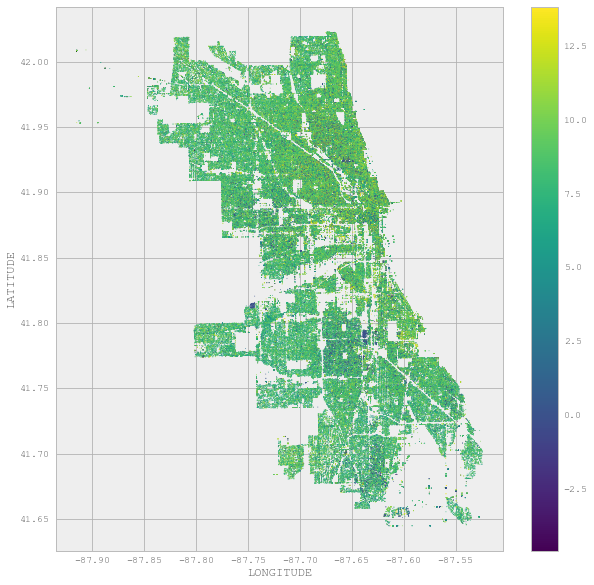

In [188]:
fig, ax = plt.subplots(figsize=(10, 10))
df_permits_new.plot(kind='scatter', ax=ax, x='LONGITUDE', y='LATITUDE', s=0.1, 
                c=df_permits_new['ESTIMATED_COST'].apply(np.log), colorbar=True, colormap='viridis')

## DataFrames: Advanced Data Manipulation

Pandas object can be grouped using columns or row criteria. The addresses of the construction sites do not have zipcode, so we will be looking at the contractor zipcodes

In [213]:
contractor_group = df_permits_new.groupby('CONTRACTOR_1_ZIPCODE', sort=True)

#count which zipcode had the most 1st subcontractors 
contractor_group.size().sort_values(ascending=False)

CONTRACTOR_1_ZIPCODE
60523-        9666
75063-        8611
60447         7940
60606-        7607
60602-        7482
60062-        5603
60618         5361
60641-        5106
60614         4864
60630-        4841
60622-        4839
60630         4794
60007         4294
60622         4263
60612-        4236
60641         4216
60453-        4156
60647         4114
60634         3859
60639-        3580
60618-        3535
60126-        3479
60651-        3475
60007-        3381
60148-        3252
60101-        3085
60608         2981
60638         2934
60453         2869
60606         2830
              ... 
60636-2412       1
60636-3416       1
60636-4020       1
60636-8853       1
60637-1824       1
60632-2768       1
60631-3203       1
60625-2919       1
60629-1207       1
60625-3909       1
60625-4005       1
60625-4278       1
60625-5913       1
60625-6743       1
60626-4106       1
60628-4045       1
60628-5413       1
60628-8811       1
60629-1724       1
60630-4304       1
60629-2602

In [207]:
contractor_group['AMOUNT_PAID'].mean().sort_values(ascending=False).head(20)

CONTRACTOR_1_ZIPCODE
68124-        36805.50
84703         34451.16
08010         21503.55
77046         17658.41
11222-        17515.00
75039-        15687.79
46250         15375.00
75235-        14135.00
10170-        13814.50
60651-1615    13564.10
55403-        12435.76
80124         10974.76
08110          9904.84
60618-8008     9560.00
60037          9293.98
55437          9098.27
60144          8123.81
06525          7869.00
89117-         7868.90
52003          7792.11
Name: AMOUNT_PAID, dtype: float64

Apply multiple action on groups at once

In [217]:
ammount_paid = contractor_group['AMOUNT_PAID'].agg([np.sum, np.mean, np.std])
ammount_paid

,sum,mean,std
CONTRACTOR_1_ZIPCODE,,,
+60632,269.00,269.000000,NaN
- 606,9443.00,269.800000,67.424817
0 -,3200.00,457.142857,97.590007
00000,3916.00,1305.333333,1653.624000
0004,50.00,50.000000,NaN
00840,350.00,350.000000,NaN
01103,646.00,646.000000,NaN
01118,100.00,50.000000,0.000000
01604,257.00,257.000000,NaN


In [218]:
ammount_paid.dropna()

,sum,mean,std
CONTRACTOR_1_ZIPCODE,,,
- 606,9443.00,269.800000,67.424817
0 -,3200.00,457.142857,97.590007
00000,3916.00,1305.333333,1653.624000
01118,100.00,50.000000,0.000000
01801,4925.00,615.625000,431.760826
02108,1200.00,300.000000,0.000000
02109,975.00,162.500000,115.920231
02110,2645.00,1322.500000,1339.967350
02111,1518.40,506.133333,227.129596


In [219]:
ammount_paid.dropna().sort_values('std', ascending=False)

,sum,mean,std
CONTRACTOR_1_ZIPCODE,,,
75039-,31375.58,15687.790000,21690.910635
55403-,24871.52,12435.760000,14602.829834
60600-,53714.90,4131.915385,13408.321905
90245,59890.08,6654.453333,13297.049786
60654-,557365.98,805.442168,11249.143651
10022-,20822.00,5205.500000,8611.880805
60610-,835094.59,952.217320,8117.279574
53201,20195.16,5048.790000,8093.956543
66142,12596.00,6298.000000,7407.650640


### Exercise

Use `df_inspection` dataframe and find the addresses that had the most inspections. Count how many health inspections were at each address. Use `groupby` function to solve this problem.

,Latitude,Longitude
Address,,
,NaN,NaN
1 E 113TH ST,41.688848,-87.622894
1 E 83RD ST,41.743547,-87.624252
1 E DELAWARE PL,41.899031,-87.628192
1 E ERIE ST,41.893964,-87.628063
1 E JACKSON BLVD,41.878110,-87.627535
1 E WACKER DR,41.886708,-87.627883
1 N DEARBORN ST,41.882030,-87.629256
1 N FRANKLIN ST,41.881967,-87.635165


Add `Latitude` and `Longitude` columns for plotting purposes.

Make a scatter plot of the inspection locations and use logarithm of violation counts to chose the color of the point

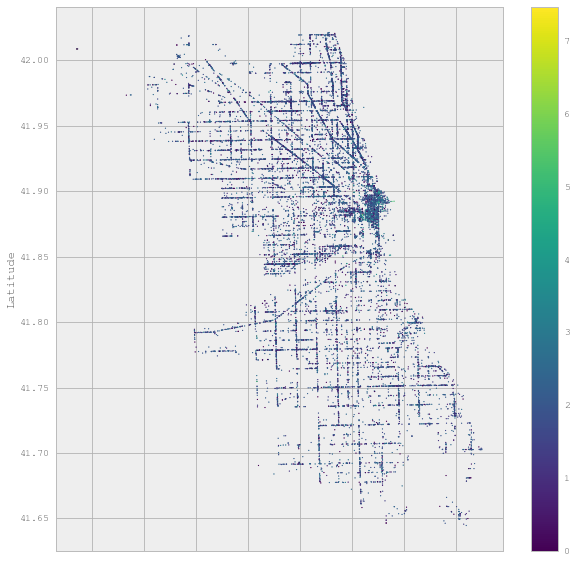

## Working with dates

Group permits by issue date, count how many permit were issued on. Ue `sort_index` function to sort the date

In [321]:
date_group = df_permits.groupby('ISSUE_DATE')
counts = date_group['PERMIT_TYPE'].count()
print(counts)

ISSUE_DATE
01/01/2008      3
01/01/2009      2
01/01/2012      2
01/01/2013      2
01/01/2014      7
01/01/2015      2
01/01/2016      4
01/01/2017      2
01/02/2004      2
01/02/2007    114
01/02/2008    150
01/02/2009     13
01/02/2011      2
01/02/2012     11
01/02/2013     81
01/02/2014     41
01/02/2015     56
01/02/2016      5
01/02/2017     14
01/03/2002      1
01/03/2006    244
01/03/2007     97
01/03/2008    115
01/03/2009      1
01/03/2010      1
01/03/2011     95
01/03/2012     77
01/03/2013     78
01/03/2014     59
01/03/2015      5
             ... 
12/29/2008     85
12/29/2009    116
12/29/2010     86
12/29/2011     86
12/29/2012      6
12/29/2013      1
12/29/2014    100
12/29/2015    130
12/29/2016    129
12/30/2005     20
12/30/2007      2
12/30/2008     92
12/30/2009     83
12/30/2010     47
12/30/2011     43
12/30/2012      6
12/30/2013     62
12/30/2014     97
12/30/2015    124
12/30/2016     69
12/31/2007     36
12/31/2008     91
12/31/2009     67
12/31/2010      9

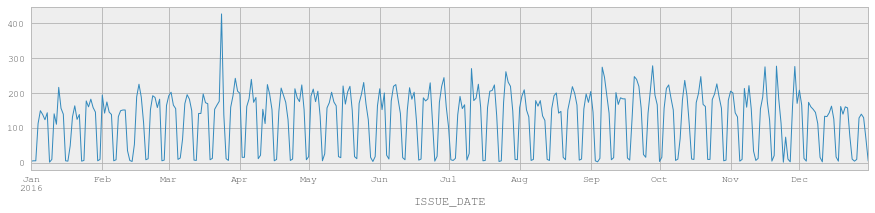

In [308]:
import datetime

counts.index = pd.to_datetime(counts.index)
counts.sort_index()
counts_2016 = counts[(counts.index.date >= datetime.date(2016, 1, 1))
                     & (counts.index.date < datetime.date(2017, 1, 1))]
counts_2016.plot()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


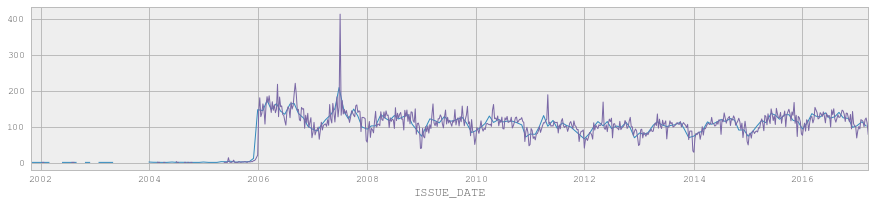

In [313]:
counts.resample('M').plot()
counts.resample('W').plot()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


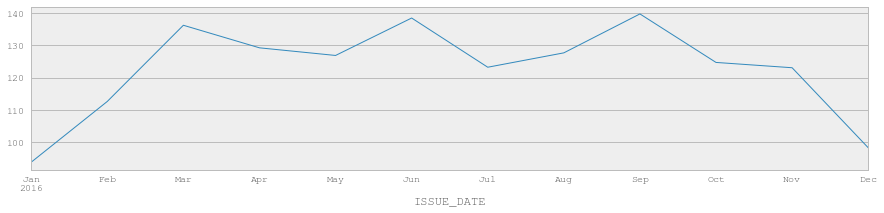

In [316]:
counts_2016_W = counts_2016.resample('M')
counts_2016_W.plot()

### Exercise 

Plots the number of the inspections in 2016 from the `df_inspection` dataframe and resample the data for every week and month.

## Merging DataFrames

In [320]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                               'C': ['C0', 'C1', 'C2', 'C3'],
                                'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on='key')

print(result)


    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3
